<a href="https://colab.research.google.com/github/Eman-diab-hussein/deep/blob/main/deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Assuming your datasets are in the root of your Google Drive
train_path = '/content/drive/MyDrive/vegat'
test_path = '/content/drive/MyDrive/testing'
import os

print("training")
print(os.listdir(train_path))

print("testing")
print(os.listdir(test_path))


training
['elephant', 'cuc', 'machroom']
testing
['mashrom', 'cuc1', 'elephant1']


In [ ]:
import os
# Define the training and validation base directories
train_dir = '/content/drive/MyDrive/vegat'
validation_dir = '/content/drive/MyDrive/testing'

# Directory with training class_1 pictures
train_eggplant_dir = os.path.join(train_dir, 'elephant')
# Directory with training class_2 pictures
train_cucumber_dir = os.path.join(train_dir, 'cuc')
# Directory with training class_3 pictures
train_mushroom_dir = os.path.join(train_dir, 'machroom')

# Directory with validation class_1 pictures
validation_eggplant_dir = os.path.join(validation_dir, 'mashrom')
# Directory with validation class_2 pictures
validation_cucumber_dir = os.path.join(validation_dir, 'cuc1')
# Directory with validation class_3 pictures
validation_mushroom_dir = os.path.join(validation_dir, 'elephant1')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_eggplant_dir))} images of eggplant for training.\n")
print(f"There are {len(os.listdir(train_cucumber_dir))} images of cuc for training.\n")
print(f"There are {len(os.listdir(train_mushroom_dir))} images of machoom for training.\n")
print(f"There are {len(os.listdir(validation_eggplant_dir))} images of eggplant for validation.\n")
print(f"There are {len(os.listdir(validation_cucumber_dir ))} images of cuc1  for validation.\n")
print(f"There are {len(os.listdir(validation_mushroom_dir))} images of mushroom for validation.\n")


There are 70 images of eggplant for training.

There are 60 images of cuc for training.

There are 72 images of machoom for training.

There are 50 images of eggplant for validation.

There are 57 images of cuc1  for validation.

There are 54 images of mushroom for validation.



Sample eggplant image:


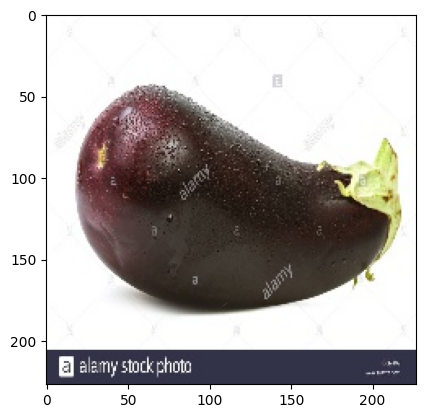


Sample cucumber image:


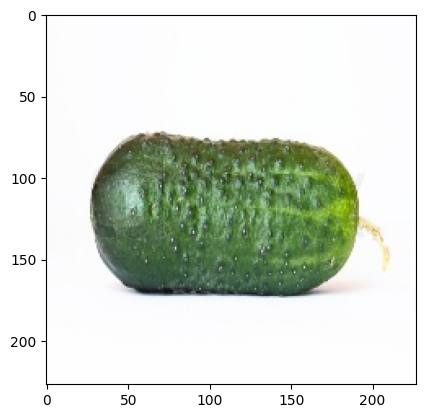


Sample machroom image:


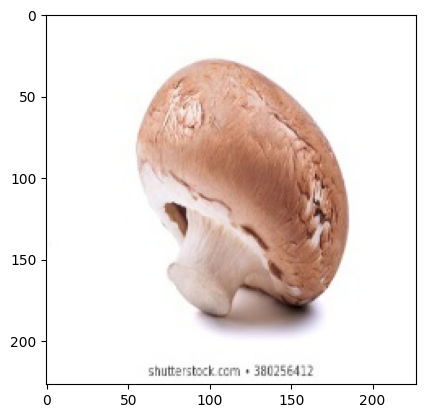

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
print("Sample eggplant image:")
plt.imshow(load_img(f"{os.path.join(train_eggplant_dir, os.listdir(train_eggplant_dir)[0])}"))
plt.show()

print("\nSample cucumber image:")
plt.imshow(load_img(f"{os.path.join(train_cucumber_dir, os.listdir(train_cucumber_dir)[0])}"))
plt.show()

print("\nSample machroom image:")
plt.imshow(load_img(f"{os.path.join(train_mushroom_dir, os.listdir(train_mushroom_dir)[0])}"))

plt.show()

In [ ]:
# Load the first example of a eggplant
sample_image  = load_img(f"{os.path.join(train_eggplant_dir, os.listdir(train_eggplant_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (227, 227, 3)


In [ ]:
!pip install tensorflow-hub


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your training and testing datasets
train_data_dir = '/content/drive/MyDrive/vegat'
test_data_dir = '/content/drive/MyDrive/testing'

# Define image size and batch size
image_size = (224, 224)  # Adjust the size as needed for MobileNetV2
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assumes you have three classes
    shuffle=True
)

# Flow validation images in batches using test_datagen
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assumes you have three classes
    shuffle=False  # Do not shuffle for better evaluation
)

# Download MobileNetV2 model without the top classification layers
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Build a new model on top of the pre-trained base
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # Three classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


Found 101 images belonging to 3 classes.
Found 80 images belonging to 3 classes.
9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/10
3/3 [==============================] - 108s 37s/step - loss: 1.0705 - accuracy: 0.4928 - val_loss: 0.8891 - val_accuracy: 0.6250
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 0.6150 - accuracy: 0.7681 - val_loss: 0.2597 - val_accuracy: 0.9062
Epoch 3/10
3/3 [==============================] - 10s 3s/step - loss: 0.1744 - accuracy: 0.9479 - val_loss: 0.2454 - val_accuracy: 0.8750
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 0.2349 - accuracy: 0.8986 - val_loss: 0.1852 - val_accuracy: 0.9375
Epoch 5/10
3/3 [==============================] - 12s 5s/step - loss: 0.1751 - accuracy: 0.9062 - val_loss: 0.1046 - val_accuracy: 0.9688
Epoch 6/10
3/3 [==============================] - 7s 2s/step - loss: 0.0833 - accuracy: 0.9710 - val_loss: 0.1738 - val_accuracy: 0.9219
Epoch 7/10
3/3 [=============

In [ ]:
# Download the mobileNetV2 weights
!wget --no-check-certificate \
   https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5\
    -O /tmp/mobilenet_v2_weights.h5

--2023-11-13 15:34:16--  https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.174.207, 74.125.23.207, 74.125.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.174.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9406464 (9.0M) [application/octet-stream]
Saving to: ‘/tmp/mobilenet_v2_weights.h5’

/tmp/mobilenet_v2_w 100%[===================>]   8.97M  7.15MB/s    in 1.3s    

2023-11-13 15:34:18 (7.15 MB/s) - ‘/tmp/mobilenet_v2_weights.h5’ saved [9406464/9406464]



In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/mobilenet_v2_weights.h5'

In [ ]:
def create_pre_trained_model(local_weights_file, include_top=False):
  ### START CODE HERE
  pre_trained_model = MobileNetV2(input_shape = (150, 150, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  ### END CODE HERE

  return pre_trained_model


In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model
pre_trained_model.summary()

Model: "mobilenetv2_1.00_150"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 75, 75, 32)           864       ['input_14[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 75, 75, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 75, 75, 32)           0         ['bn_Conv1[

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


3/3 [==============================] - 4s 1s/step - loss: 0.1344 - accuracy: 0.9500
Test Loss: 0.13441941142082214, Test Accuracy: 0.949999988079071


In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model):
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output

In [ ]:
pip install matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras import layers

# Load pre-trained MobileNetV2 model
pre_trained_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Freeze the layers up to a certain index (e.g., all layers up to block 10)
freeze_up_to_layer = 10

for layer in pre_trained_model.layers[:freeze_up_to_layer]:
    layer.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 2,586,691 total parameters in this model.
There are 328,707 trainable parameters in this model.


In [ ]:
 #Assuming you have a `test_generator` for your test set
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


3/3 [==============================] - 5s 1s/step - loss: 0.1344 - accuracy: 0.9500
Test Loss: 0.1344
Test Accuracy: 0.9500


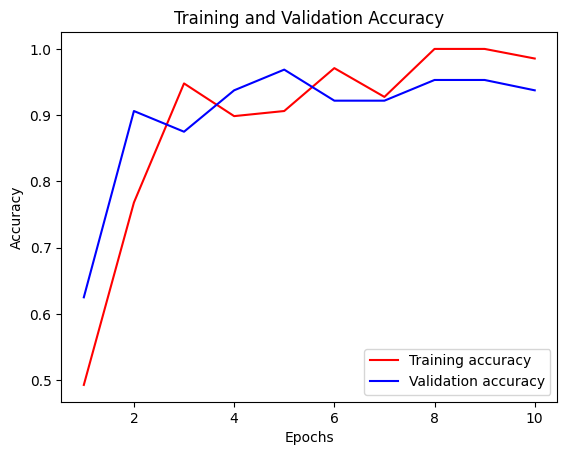

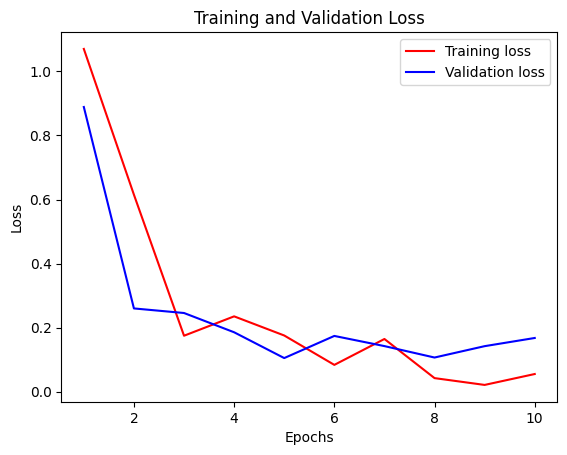

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have 'history' variable containing training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracies
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# Plotting training and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()
